In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [70]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [71]:
X = df[['Ground Temperature']] #independent data
Y = df[['Chirps/Second']] #dependent data

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) #splitting the data for train and test

lin = linear_model.LinearRegression() #object of class
lin.fit(x_train,y_train) #fitting the data
pred = lin.predict(x_train)


In [72]:
#Task1: Find the linear regression equation for this data.

p = lin.coef_[0][0]
q = lin.intercept_[0]

#Linear regression equation: y = a + bx

print('Linear regression equation: y = ', p, '+ x *', q)

Linear regression equation: y =  0.2604847992867076 + x * -4.39540507511084


Text(0, 0.5, 'Chirps/Second')

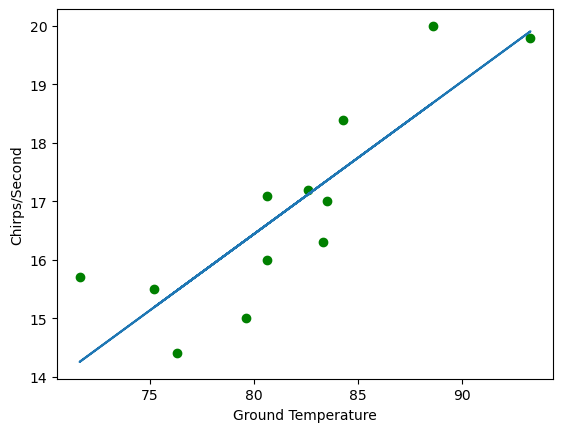

In [73]:
#Task2: Chart the original data and the equation on the chart.

plt.scatter(x_train,y_train,color='g')
plt.plot(x_train,pred)
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')

In [74]:
#Task3: Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

print('𝑅2 score for training data:',lin.score(x_train,y_train))
print('𝑅2 score for testing data:',lin.score(x_test,y_test))

print('𝑅2 score is less than 0.8 in training data and negative in testing data, therefore this is not a good fit for this data.')

𝑅2 score for training data: 0.7320151408745238
𝑅2 score for testing data: -7.123067147681807
𝑅2 score is less than 0.8 in training data and negative in testing data, therefore this is not a good fit for this data.


In [75]:
#Task4: Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

t = lin.predict([[95]])
print('If the ground temperature reached 95, approximate rate crickets would be chirping:',t[0][0])


If the ground temperature reached 95, approximate rate crickets would be chirping: 20.350650857126382


/Users/adityaradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
#Task 5: Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

def chirps_to_temp(j):
    ret = (j - lin.intercept_) / lin.coef_[0][0]
    print('For',j,'chrips','approximate ground temperature is:', ret[0])

chirps_to_temp(18)

For 18 chrips approximate ground temperature is: 85.97586168727223


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [76]:
df = pd.read_fwf("brain_body.txt")

In [81]:
body = df[['Body']] #independent data
brain = df[['Brain']] #dependent data

lin = linear_model.LinearRegression() #object of class
lin.fit(body,brain) #fitting the data
pred = lin.predict(body)

In [82]:
#Task 1: Find the linear regression equation for this data for brain weight to body weight.

p2 = lin.coef_[0][0]
q2 = lin.intercept_[0]

#Linear regression equation: y = a + bx

print('Linear regression equation: y = ', p2, '+ x *', q2)


Linear regression equation: y =  0.9029129477287058 + x * -56.8555454285964


Text(0, 0.5, 'Brain Weight')

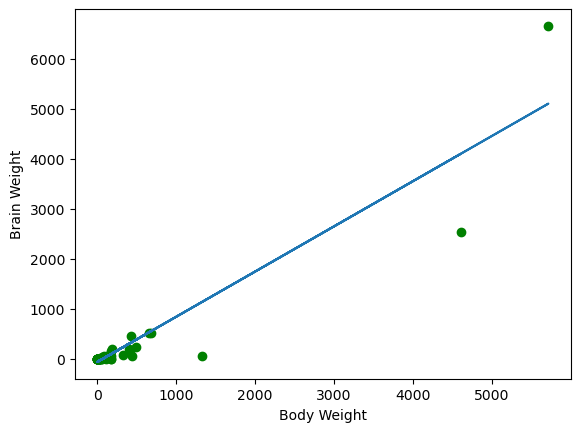

In [83]:
#Task 2: Chart the original data and the equation on the chart.

plt.scatter(body,brain,color='g')
plt.plot(body,pred)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

In [85]:
#Task 3: Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

print('𝑅2 score:',lin.score(body,brain))

print('𝑅2 score is more than 0.8, therefore this is good fit for this data.')

𝑅2 score: 0.8726620843043331
𝑅2 score is more than 0.8, therefore this is good fit for this data.


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [7]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [4]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [9]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [10]:
#Salary Discrimination, Task 1

lin_reg_eq_print(salary_discrim_cols, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255561


In [11]:
# Salary Discrimination, Task 2

def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

print('R2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df_sd)))

R2 score for equation using all columns: 0.854718067441097


In [ ]:
#Salary Discrimination, Task 3

#Salary Discrimination, Task 3 – Important Result
#Again, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.

df_sd_10 = df_sd[df_sd['Year'] <= 10]
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)